In [1]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

print('Import Done')

Import Done


In [3]:
import requests
import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(URL)
df = pd.read_csv(io.BytesIO(response.content))
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [10]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [7]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [15]:
#Line chart 1
#how automobile sales fluctuate from year to year

df_autosales = df.groupby('Year')['Automobile_Sales'].mean()
df_autosales.head()

Year
1980     678.950000
1981     633.408333
1982     631.150000
1983    2889.350000
1984    2972.250000
Name: Automobile_Sales, dtype: float64

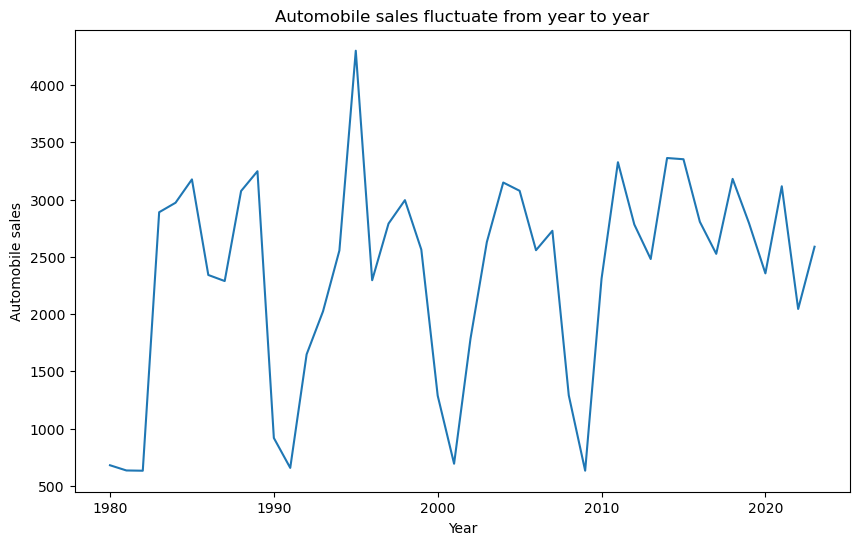

In [16]:
plt.figure(figsize=(10,6))
# or df_autosales.plot(x=df_autosales.index, y=df_autosales.values)
df_autosales.plot(kind='line')
plt.title('Automobile sales fluctuate from year to year')
plt.xlabel('Year')
plt.ylabel('Automobile sales')
plt.show()

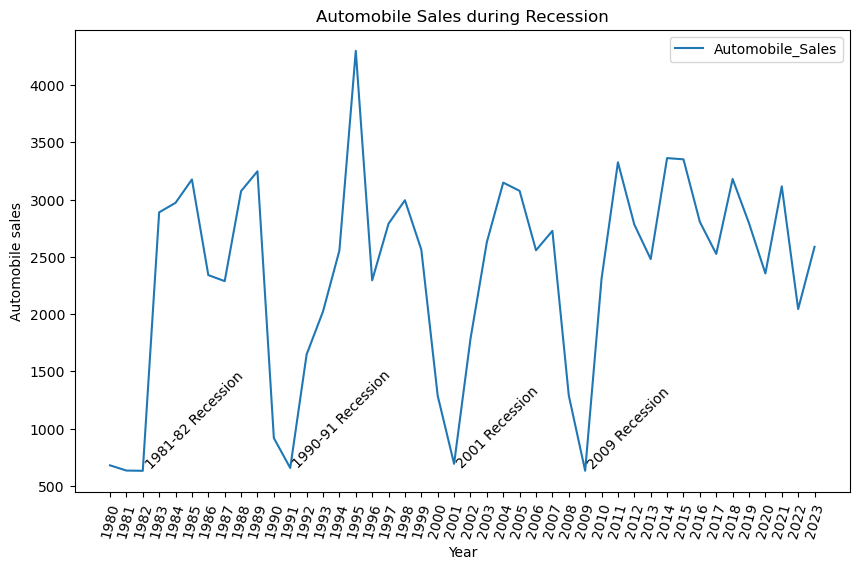

In [60]:
plt.figure(figsize=(10, 6))

df_autosales.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Automobile sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession', rotation=45)
plt.text(1991, 655, '1990-91 Recession', rotation=45)
plt.text(2001, 658, '2001 Recession', rotation=45)
plt.text(2009, 650, '2009 Recession', rotation=45)
plt.legend()
plt.show()

In [17]:
#Line chart 2
#sales trends between different vehicle types

df_line2 = df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_line2.set_index('Year', inplace=True)
df_line2.head()

,Vehicle_Type,Automobile_Sales
Year,,
1980,Mediumfamilycar,2882.5
1980,Smallfamiliycar,2085.7
1980,Supperminicar,3179.2
1981,Mediumfamilycar,1885.2
1981,Smallfamiliycar,3192.1


In [18]:
df_line2 = df_line2.groupby(['Vehicle_Type'])['Automobile_Sales']
df_line2.head()

Year
1980     2882.5
1980     2085.7
1980     3179.2
1981     1885.2
1981     3192.1
1981     2523.6
1982     5062.9
1982     2408.9
1982      102.0
1983     4120.2
1983    12845.6
1983     5030.6
1983     7998.7
1983     4677.1
1984     6261.6
1984    12299.7
1984     6175.8
1984     2514.0
1984     8415.9
1985    10892.0
1985     7068.4
1986     3163.0
1986     8740.0
1986     4178.5
1987     6676.0
Name: Automobile_Sales, dtype: float64

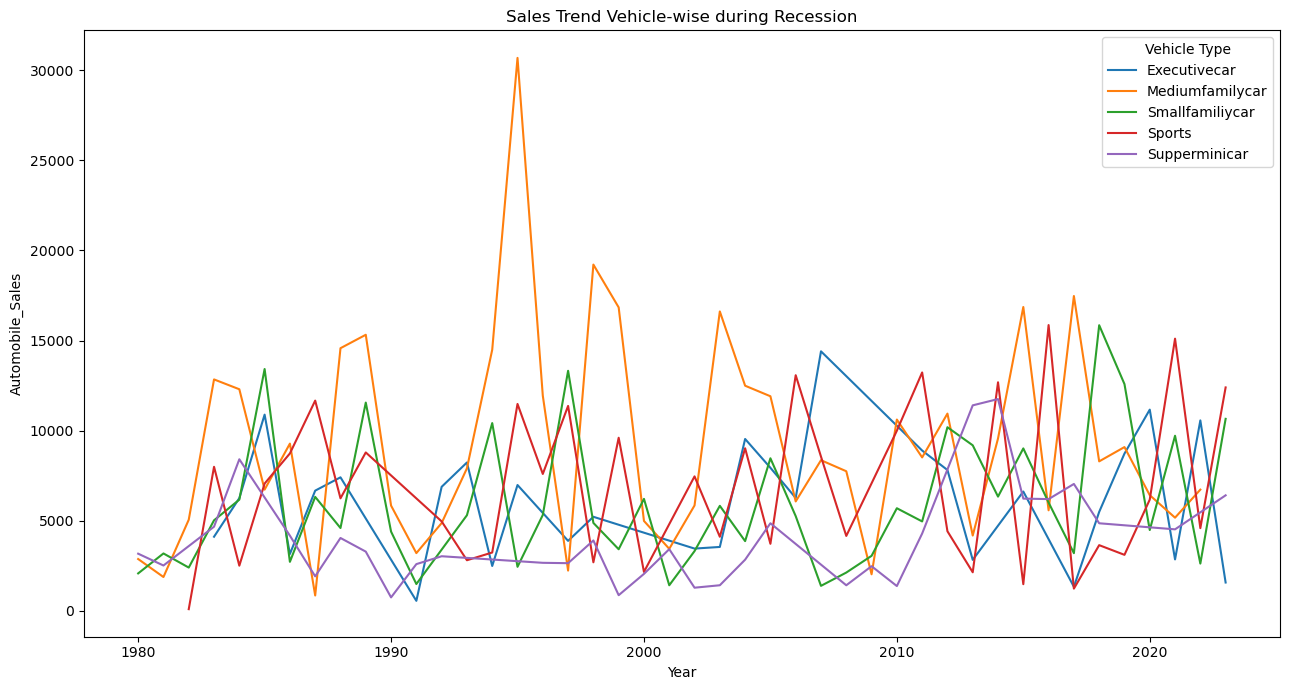

In [67]:
plt.figure(figsize=(13, 7))

df_line2.plot(kind='line', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Automobile_Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

In [22]:
df['Recession'].unique()

array([1, 0])

In [30]:
df_new = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
df_new.head()

,Recession,Automobile_Sales
0,0,2816.753590
1,1,648.516814


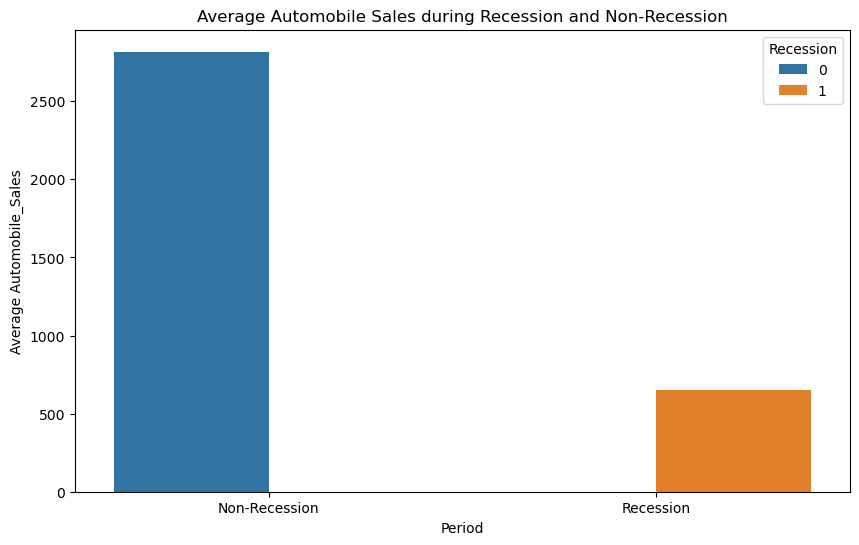

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_new['Recession'], y=df_new['Automobile_Sales'], hue=df_new['Recession'], data=df_new)
plt.xlabel('Period')
plt.ylabel('Average Automobile_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.show()

In [35]:
recession_data = df[df['Recession'] ==1]

# sales by vehicle types during Recession
sales_by_vehicle = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
sales_by_vehicle

,Vehicle_Type,Automobile_Sales
0,Executivecar,564.0
1,Mediumfamilycar,28343.6
2,Smallfamiliycar,23426.4
3,Sports,511.0
4,Supperminicar,20437.4


In [36]:
# ales of different vehicle types during a recession and a non-recession period
df_bar = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
df_bar.head()

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222


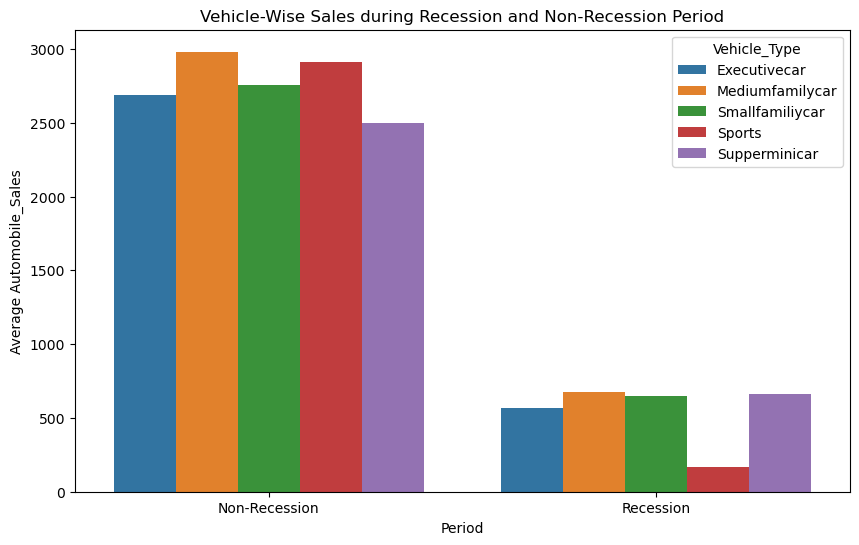

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_bar['Recession'], y=df_bar['Automobile_Sales'], hue=df_bar['Vehicle_Type'], data=df_bar)
plt.xlabel('Period')
plt.ylabel('Average Automobile_Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.show()

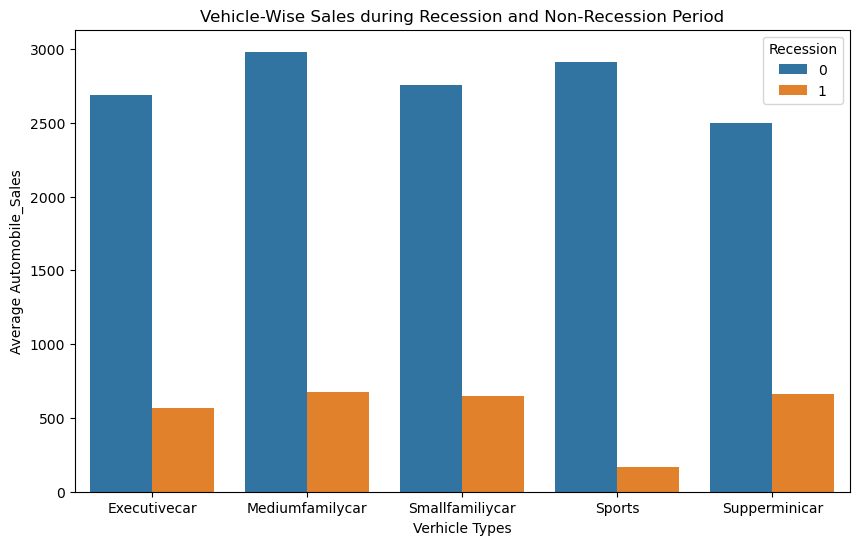

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_bar['Vehicle_Type'], y=df_bar['Automobile_Sales'], hue=df_bar['Recession'], data=df_bar)
plt.xlabel('Verhicle Types')
plt.ylabel('Average Automobile_Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

In [45]:
recession = df[df['Recession'] == 1]
non_recession = df[df['Recession'] == 0]

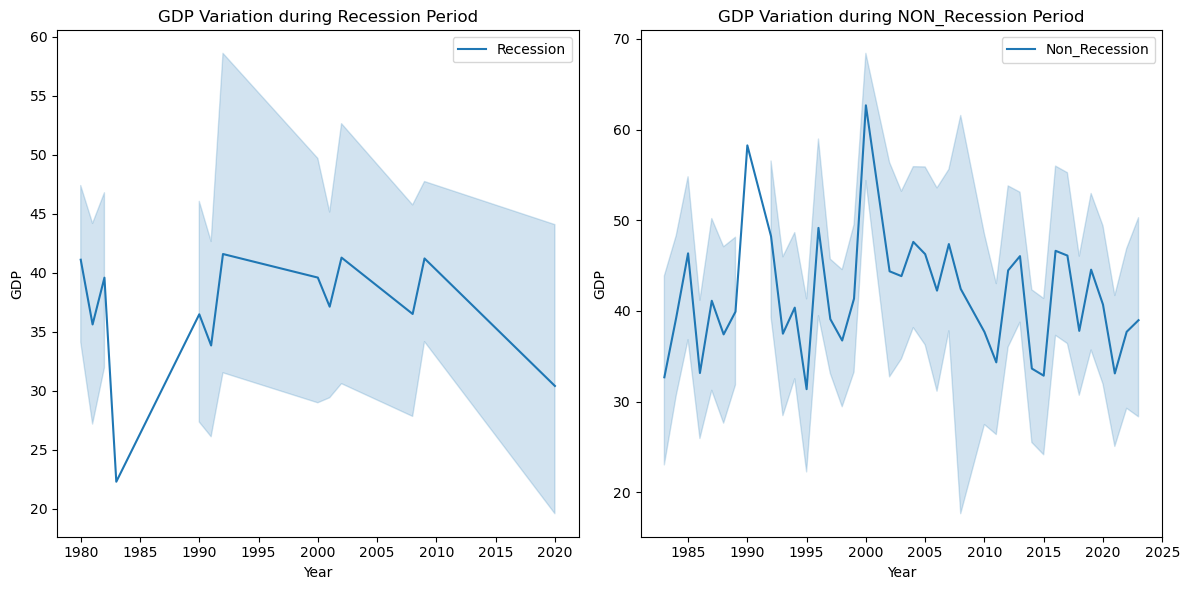

In [46]:
fig=plt.figure(figsize=(12,6))

#subplot 1
ax0 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
sns.lineplot(data=recession, x='Year', y='GDP', label='Recession', ax=ax0)
ax0.set_title('GDP Variation during Recession Period')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')

#subplot 2
ax1 = fig.add_subplot(1,2,2) # add subplot 1 (1 row, 2 columns, first plot)
sns.lineplot(data=non_recession, x='Year', y='GDP', label='Non_Recession', ax=ax1)
ax1.set_title('GDP Variation during NON_Recession Period')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

plt.tight_layout()
plt.show()

In [76]:
size = non_recession['Seasonality_Weight'] * 10
size

113     7.5
114    15.0
115    10.0
116    15.0
117     7.5
       ... 
523     2.5
524     0.7
525     1.2
526     2.5
527     3.4
Name: Seasonality_Weight, Length: 415, dtype: float64

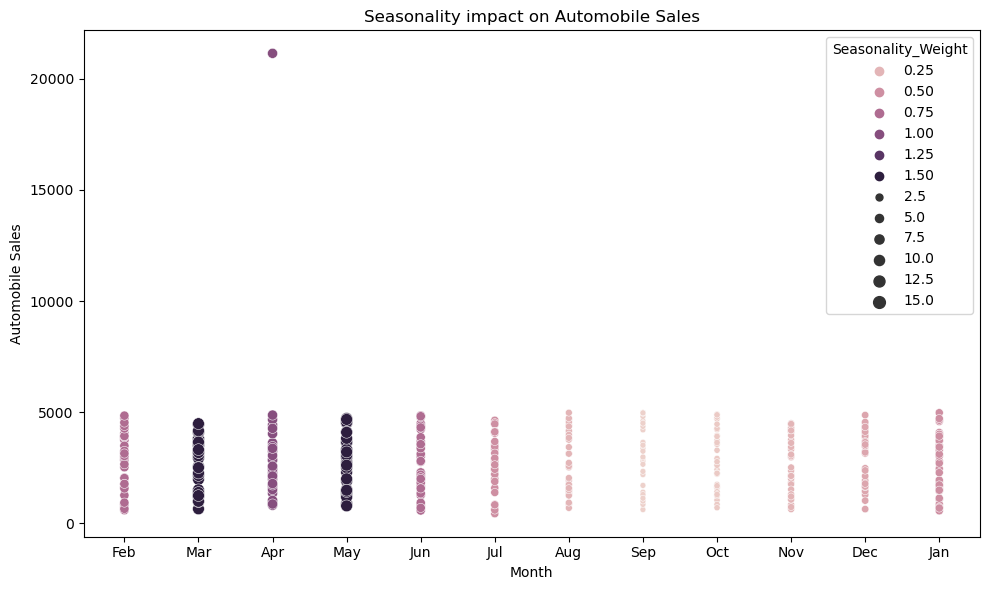

In [78]:

fig=plt.figure(figsize=(10,6))
sns.scatterplot(data=non_recession, x='Month', y='Automobile_Sales', size = size, hue='Seasonality_Weight')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.tight_layout()
plt.show()

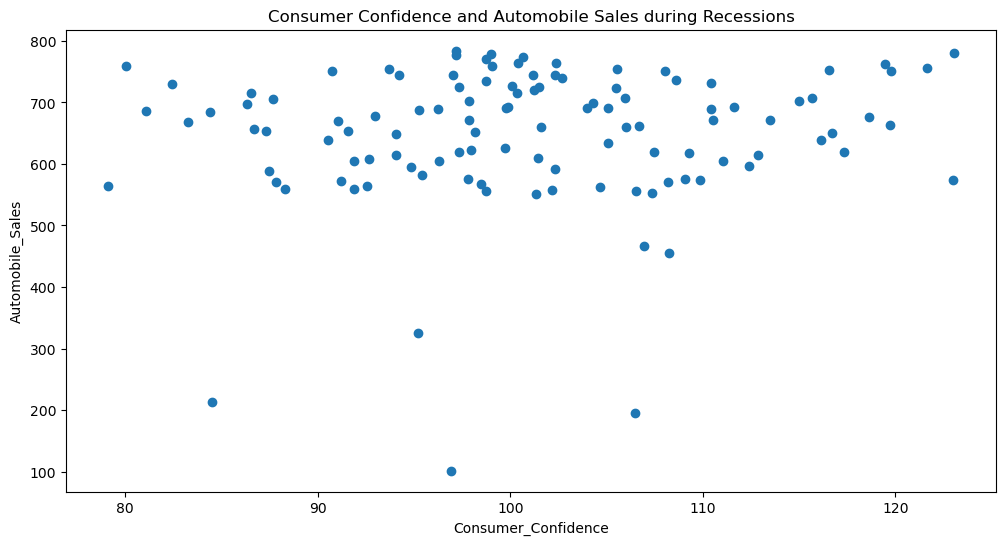

In [79]:
# correlation between average vehicle price relate to the sales volume during recessions

fig=plt.figure(figsize=(12,6))

plt.scatter(recession['Consumer_Confidence'], recession['Automobile_Sales'])
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.show()


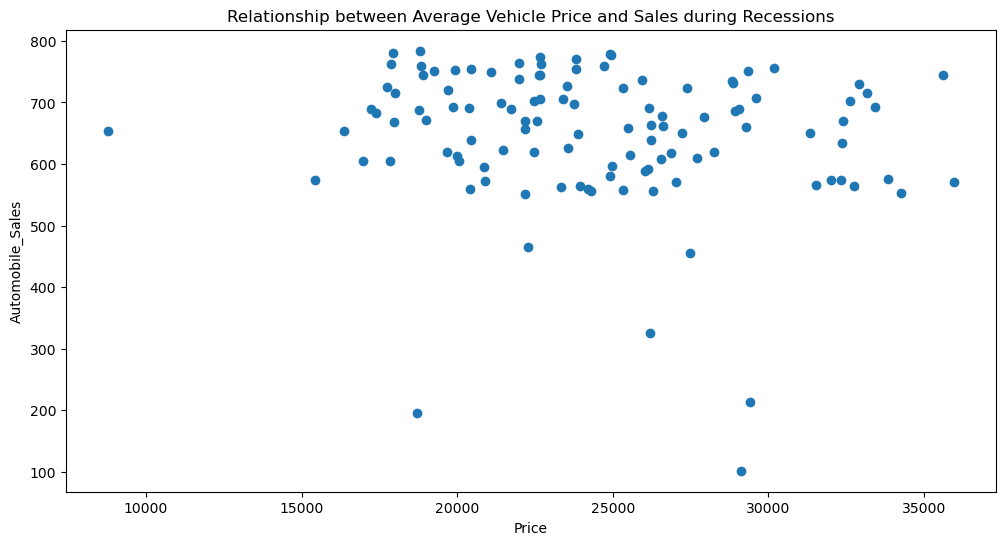

In [80]:
#the average vehicle price relate to the sales volume during recessions

fig=plt.figure(figsize=(12,6))

plt.scatter(recession['Price'], recession['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.show()


In [86]:
print('Advertising Expenditure during Recession:', recession['Advertising_Expenditure'].sum())
print('Advertising Expenditure during Non_Recession:', non_recession['Advertising_Expenditure'].sum())




Advertising Expenditure during Recession: 339910
Advertising Expenditure during Non_Recession: 1279707


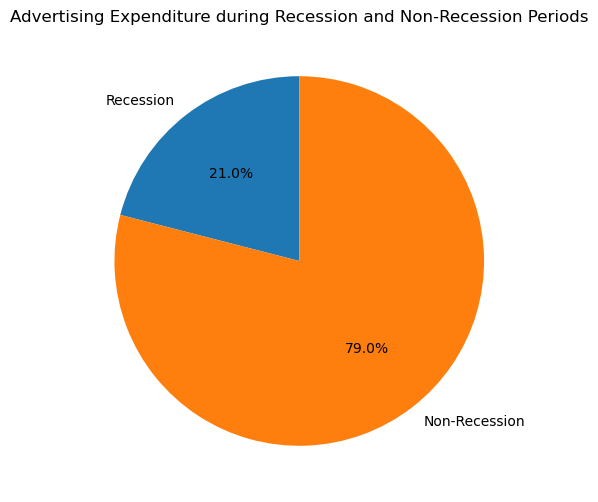

In [87]:
plt.figure(figsize=(8,6))
labels = ['Recession', 'Non-Recession']
sizes = [recession['Advertising_Expenditure'].sum(), non_recession['Advertising_Expenditure'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

In [89]:
pie2 = recession.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
pie2.head()

Vehicle_Type
Executivecar         3243
Mediumfamilycar    130612
Smallfamiliycar    102759
Sports              12568
Supperminicar       90728
Name: Advertising_Expenditure, dtype: int64

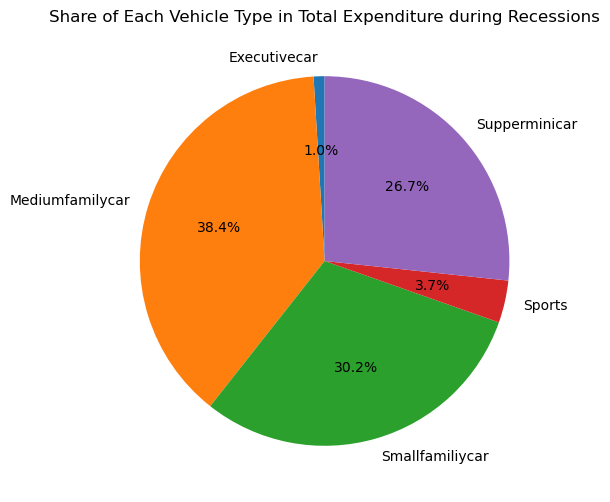

In [90]:
plt.figure(figsize=(8,6))
labels = pie2.index
sizes = pie2.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

plt.show()

/var/folders/d4/qsbmfjq53q91nw6x9mhmnkwc0000gn/T/ipykernel_2165/134608526.py:1: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=recession, x='unemployment_rate', y='Automobile_Sales',


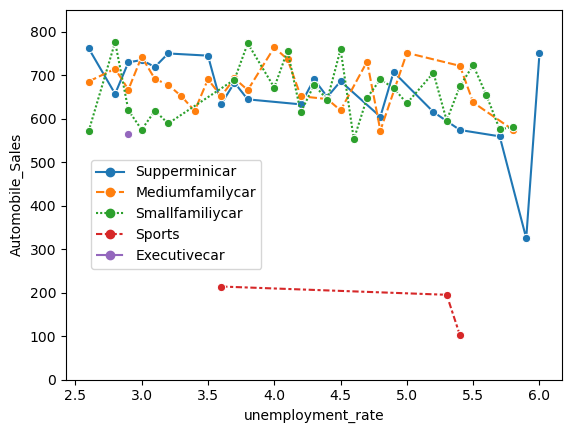

In [94]:
sns.lineplot(data=recession, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

plt.show()

In [96]:
import aiohttp
import asyncio

async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                with open(filename, "wb") as f:
                    f.write(await response.read())

async def main():
    path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
    await download(path, "us-states.json")

await main()


In [99]:


filename = "us-states.json"
!head -2 us-states.json

{"type":"FeatureCollection","features":[
{"type":"Feature","id":"AL","properties":{"name":"Alabama"},"geometry":{"type":"Polygon","coordinates":[[[-87.359296,35.00118],[-85.606675,34.984749],[-85.431413,34.124869],[-85.184951,32.859696],[-85.069935,32.580372],[-84.960397,32.421541],[-85.004212,32.322956],[-84.889196,32.262709],[-85.058981,32.13674],[-85.053504,32.01077],[-85.141136,31.840985],[-85.042551,31.539753],[-85.113751,31.27686],[-85.004212,31.003013],[-85.497137,30.997536],[-87.600282,30.997536],[-87.633143,30.86609],[-87.408589,30.674397],[-87.446927,30.510088],[-87.37025,30.427934],[-87.518128,30.280057],[-87.655051,30.247195],[-87.90699,30.411504],[-87.934375,30.657966],[-88.011052,30.685351],[-88.10416,30.499135],[-88.137022,30.318396],[-88.394438,30.367688],[-88.471115,31.895754],[-88.241084,33.796253],[-88.098683,34.891641],[-88.202745,34.995703],[-87.359296,35.00118]]]}},


In [100]:
temp=pd.read_json(filename)
for row in temp["features"]:
    print(row["id"], row["properties"]["name"])

AL Alabama
AK Alaska
AZ Arizona
AR Arkansas
CA California
CO Colorado
CT Connecticut
DE Delaware
FL Florida
GA Georgia
HI Hawaii
ID Idaho
IL Illinois
IN Indiana
IA Iowa
KS Kansas
KY Kentucky
LA Louisiana
ME Maine
MD Maryland
MA Massachusetts
MI Michigan
MN Minnesota
MS Mississippi
MO Missouri
MT Montana
NE Nebraska
NV Nevada
NH New Hampshire
NJ New Jersey
NM New Mexico
NY New York
NC North Carolina
ND North Dakota
OH Ohio
OK Oklahoma
OR Oregon
PA Pennsylvania
RI Rhode Island
SC South Carolina
SD South Dakota
TN Tennessee
TX Texas
UT Utah
VT Vermont
VA Virginia
WA Washington
WV West Virginia
WI Wisconsin
WY Wyoming


In [101]:
df['City'].unique

<bound method Series.unique of 0         Georgia
1        New York
2        New York
3        Illinois
4      California
          ...    
523      New York
524    California
525    California
526       Georgia
527       Georgia
Name: City, Length: 528, dtype: object>

In [102]:
recession_data = df[df['Recession'] == 1]

In [103]:
# Calculate the total sales by city

sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

In [104]:
 # Create a base map centered on the United States

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

In [105]:
# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


    # Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

    # Display the map
map1

In [106]:
!rm -rf us-states.json